In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import math
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
C:\Users\britn\anaconda3\envs\iod\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Laptop Price Prediction using specifications 💻
Predict the prices of laptop using different features and specifications.

Several different factors can affect laptop computer prices. These factors include the brand of computer and the number of options and add-ons included in the computer package. 

In addition, the amount of memory and the speed of the processor can also affect pricing. Though less common, some consumers spend additional money to purchase a computer based on the overall “look” and design of the system.

- name brand computers are more expensive than generic versions. 

- this price increase often has more to do with name recognition than any actual superiority of the product. 

- one major difference between name brand and generic systems is that in most cases, name brand computers offer better warranties than generic versions. 

- having the option of returning a computer that is malfunctioning is often enough of an incentive to encourage many consumers to spend more money.

- functionality is an important factor in determining laptop computer prices. A computer with more memory often performs better for a longer time than a computer with less memory. 

- In addition, hard drive space is also crucial, and the size of the hard drive usually affects pricing. 

- Many consumers may also look for digital video drivers and other types of recording devices that may affect the laptop computer prices.

- Most computers come with some software pre-installed. 

- In most cases, the more software that is installed on a computer, the more expensive it is. 

- This is especially true if the installed programs are from well-established and recognizable software publishers. 

- Those considering purchasing a new laptop computer should be aware that many of the pre-installed programs may be trial versions only, and will expire within a certain time period. 

- In order to keep the programs, a code will need to be purchased, and then a permanent version of the software can be downloaded.

- Many consumers who are purchasing a new computer are buying an entire package. 

- In addition to the computer itself, these systems typically include a monitor, keyboard, and mouse. 

- Some packages may even include a printer or digital camera. The number of extras included in a computer package usually affects laptop computer prices.

- Some industry leaders in computer manufacturing make it a selling point to offer computers in sleek styling and in a variety of colors. They may also offer unusual or contemporary system design. 

- Though this is less important to many consumers, for those who do value “looks,” this type of system may be well worth the extra cost.

In [2]:
dataset1 = pd.read_csv('../DATA/laptops_test.csv')
dataset2 = pd.read_csv('../DATA/laptops_train.csv')

df = pd.concat([dataset1, dataset2], axis=0, ignore_index=True)

In [3]:
df

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,"15.6""",1366x768,Intel Core i7 7500U 2.7GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.04kg,5148468.0
1,Asus,Rog GL753VE-DS74,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99kg,15552108.0
2,Dell,Inspiron 7579,2 in 1 Convertible,"15.6""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12GB,512GB SSD,Intel HD Graphics 620,Windows,10,2.19kg,11550708.0
3,Toshiba,Portege Z30-C-1CV,Notebook,"13.3""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,7,1.2kg,10625940.0
4,Lenovo,IdeaPad 320-15ABR,Notebook,"15.6""",Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows,10,2.2kg,4881708.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Dell,Alienware 17,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,32GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,10,4.42kg,24897600.0
1298,Toshiba,Tecra A40-C-1DF,Notebook,"14.0""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows,10,1.95kg,10492560.0
1299,Asus,Rog Strix,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows,10,2.73kg,18227710.8
1300,HP,Probook 450,Notebook,"15.6""",IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.70GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce 930MX,Windows,10,2.04kg,8705268.0


In [71]:
df.Manufacturer.value_counts()

Dell         297
Lenovo       297
HP           274
Asus         157
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Vero           4
Xiaomi         4
Fujitsu        3
Chuwi          3
Google         3
LG             3
Huawei         2
Name: Manufacturer, dtype: int64

In [73]:
df = df.drop('Manufacturer', axis=1)

In [75]:
pd.get_dummies(df.Manufacturer)

AttributeError: 'DataFrame' object has no attribute 'Manufacturer'

In [4]:
df.isnull().sum()

Manufacturer                  0
Model Name                    0
Category                      0
Screen Size                   0
Screen                        0
CPU                           0
RAM                           0
 Storage                      0
GPU                           0
Operating System              0
Operating System Version    170
Weight                        0
Price                         0
dtype: int64

In [5]:
df['Operating System Version']=df['Operating System Version'].fillna(df['Operating System Version'].mode()[0])

In [9]:
df['RAM'] = df['RAM'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')
df['Weight'] = df['Weight'].str.replace('s','')
df['Screen Size'] = df['Screen Size'].str.replace('"','')

In [10]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,6,1TB HDD,Intel HD Graphics 620,Windows,10,2.04,5148468.0
1,Asus,Rog GL753VE-DS74,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99,15552108.0
2,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12,512GB SSD,Intel HD Graphics 620,Windows,10,2.19,11550708.0
3,Toshiba,Portege Z30-C-1CV,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,128GB SSD,Intel HD Graphics 520,Windows,7,1.2,10625940.0
4,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6,256GB SSD,AMD Radeon 530,Windows,10,2.2,4881708.0


In [11]:
df['RAM'] = df['RAM'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')
df['Screen Size'] = df['Screen Size'].astype('float32')

In [12]:
df.dtypes

Manufacturer                 object
Model Name                   object
Category                     object
Screen Size                 float32
Screen                       object
CPU                          object
RAM                           int32
 Storage                     object
GPU                          object
Operating System             object
Operating System Version     object
Weight                      float32
Price                       float64
dtype: object

In [13]:
df.shape

(1302, 13)

In [14]:
df.index

RangeIndex(start=0, stop=1302, step=1)

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Screen Size,1302.0,1.501665e+01,1.426766e+00,10.10,14.0,15.60,15.60,18.4
RAM,1302.0,8.376344e+00,5.082229e+00,2.00,4.0,8.00,8.00,64.0
Weight,1302.0,2.038532e+00,6.656902e-01,0.69,1.5,2.04,2.30,4.7
Price,1302.0,9.987213e+06,6.215746e+06,1547208.00,5326308.0,8687484.00,13211978.13,54232308.0


In [16]:
df['Screen Size'].value_counts()

15.600000    664
14.000000    197
13.300000    164
17.299999    164
12.500000     39
11.600000     33
13.500000      6
12.000000      6
13.900000      6
12.300000      5
15.000000      4
15.400000      4
10.100000      4
13.000000      2
18.400000      1
17.000000      1
14.100000      1
11.300000      1
Name: Screen Size, dtype: int64

In [17]:
df['RAM'].value_counts()

8     619
4     375
16    199
6      41
12     25
2      22
32     17
24      3
64      1
Name: RAM, dtype: int64

In [18]:
df['Weight'].value_counts()

2.20    126
2.10     58
2.00     45
2.40     44
2.30     40
       ... 
2.26      1
3.25      1
1.59      1
1.79      1
2.75      1
Name: Weight, Length: 171, dtype: int64

In [19]:
df['Price'].value_counts()

9772308.00     14
13329108.00    14
15996708.00    13
4437108.00     11
11550708.00    11
               ..
8785296.00      1
2243985.12      1
9923649.84      1
5352984.00      1
8909784.00      1
Name: Price, Length: 791, dtype: int64

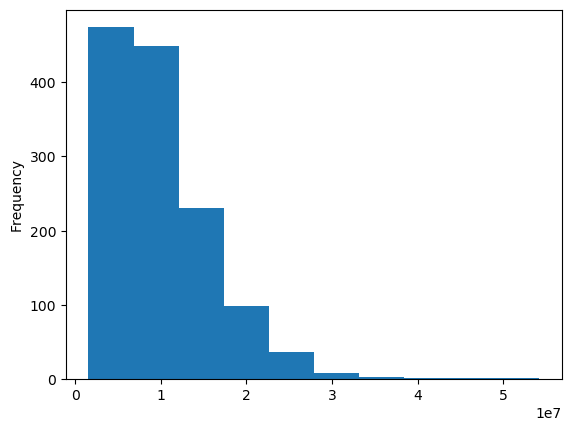

In [20]:
RM = df['Price']
RM.plot(kind='hist');

In [21]:
grouped_counts1 = df.groupby(['RAM', 'Price']).size()

In [22]:
grouped_counts2= df.groupby(['Screen Size','Price']).size()

In [23]:
grouped_counts3= df.groupby(['Weight','Price']).size()

In [24]:
print(grouped_counts1)

RAM  Price     
2    1547208.0     1
     1706374.8     1
     1769508.0     2
     1858428.0     3
     1874433.6     1
                  ..
32   34589880.0    1
     43561908.0    1
     48897108.0    1
     54232308.0    1
64   35345700.0    1
Length: 943, dtype: int64


In [25]:
print(grouped_counts2)

Screen Size  Price      
10.100000    2836548.00     1
             4259268.00     1
             4881708.00     1
             5746632.84     1
11.300000    11550708.00    1
                           ..
17.299999    35345700.00    1
             39026988.00    1
             48897108.00    1
             54232308.00    1
18.400000    24888708.00    1
Length: 1006, dtype: int64


In [26]:
print(grouped_counts3)

Weight  Price      
0.69    2836548.00     1
        4259268.00     1
        4881708.00     1
        5746632.84     1
0.81    13329108.00    1
                      ..
4.60    20362591.08    1
        23679396.00    1
        24452911.08    1
        28810080.00    1
4.70    34589880.00    1
Length: 1228, dtype: int64


# **EDA**

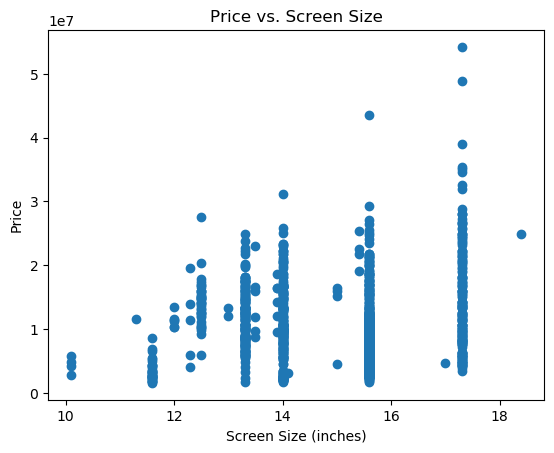

In [35]:
plt.scatter(df['Screen Size'], df['Price'])
plt.title('Price vs. Screen Size')
plt.xlabel('Screen Size (inches)')
plt.ylabel('Price')
plt.show()

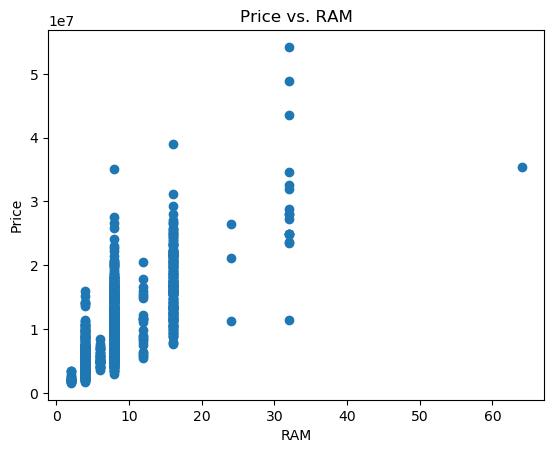

In [29]:
plt.scatter(df['RAM'], df['Price'])
plt.title('Price vs. RAM')
plt.xlabel('RAM')
plt.ylabel('Price')
plt.show()

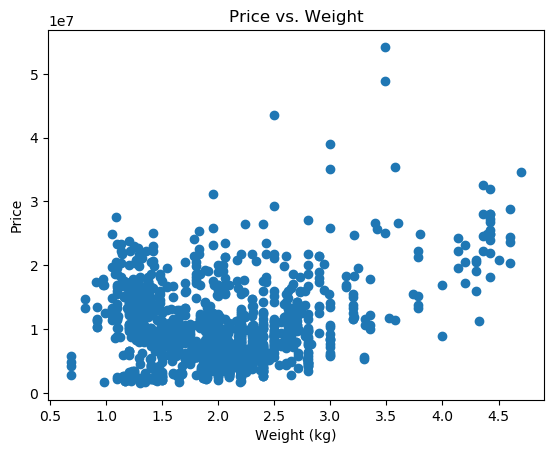

In [34]:
plt.scatter(df['Weight'], df['Price'])
plt.title('Price vs. Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Price')
plt.show()

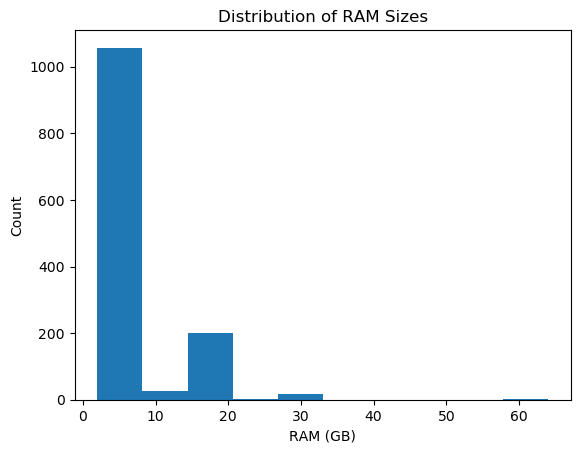

In [33]:
plt.hist(df['RAM'], bins=10)
plt.title('Distribution of RAM Sizes')
plt.xlabel('RAM (GB)')
plt.ylabel('Count')
plt.show()

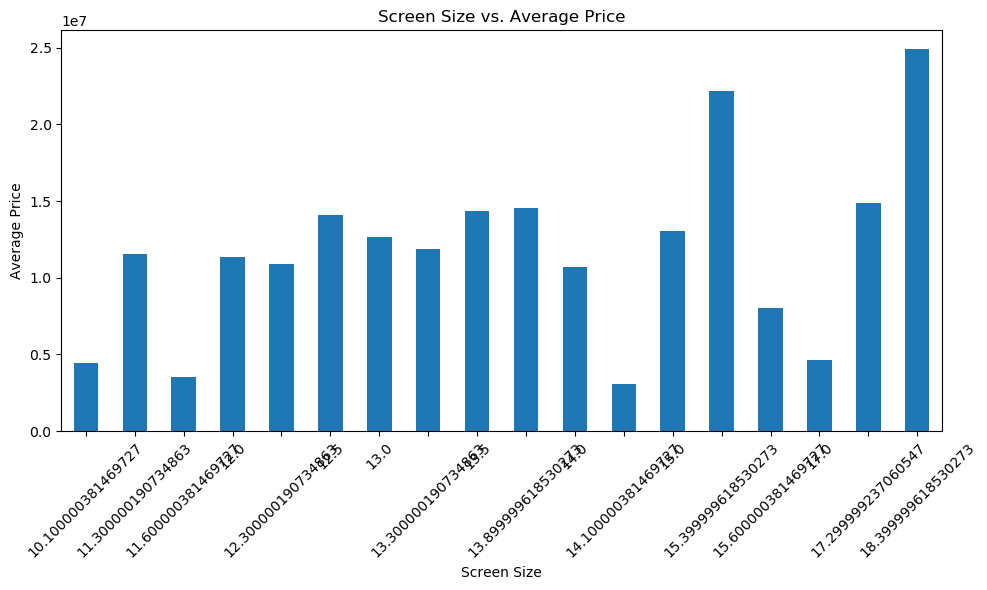

In [37]:
# Group data by screen size and calculate mean price
screen_size_price = df.groupby('Screen Size')['Price'].mean()

# Create a bar chart for screen size vs. average price
plt.figure(figsize=(10, 6))
screen_size_price.plot(kind='bar')
plt.title('Screen Size vs. Average Price')
plt.xlabel('Screen Size')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

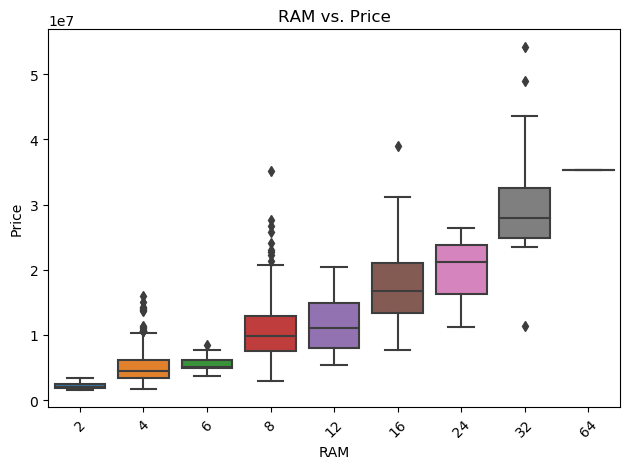

In [40]:
sns.boxplot(x='RAM', y='Price', data=df)
plt.title('RAM vs. Price')
plt.xlabel('RAM')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

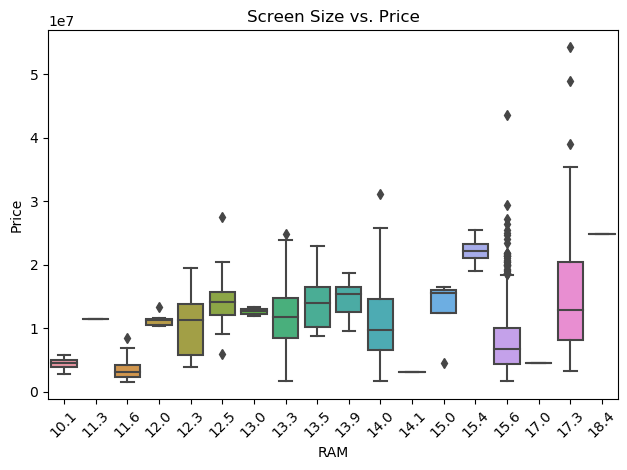

In [41]:
sns.boxplot(x='Screen Size', y='Price', data=df)
plt.title('Screen Size vs. Price')
plt.xlabel('RAM')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

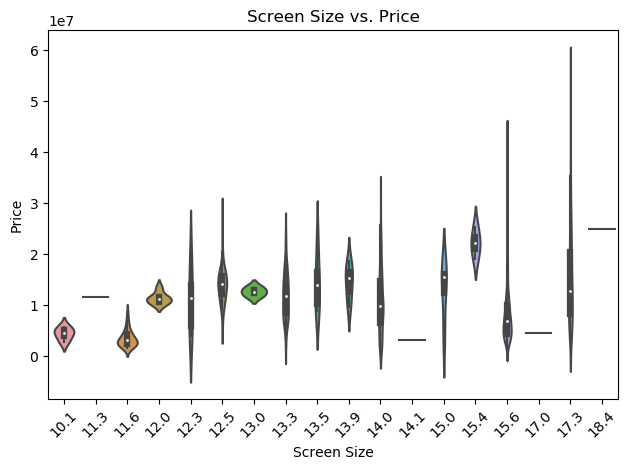

In [42]:
sns.violinplot(x='Screen Size', y='Price', data=df)
plt.title('Screen Size vs. Price')
plt.xlabel('Screen Size')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

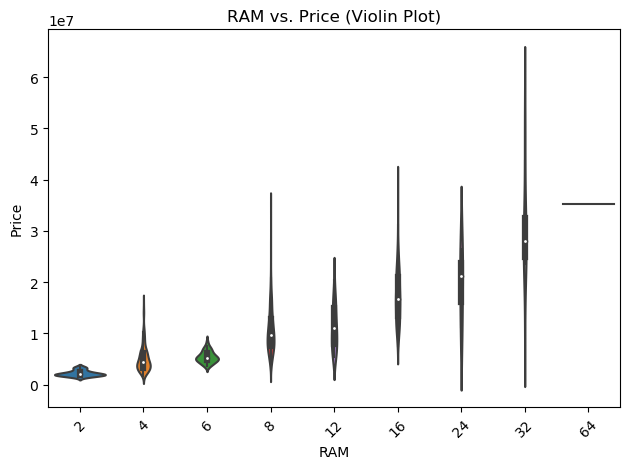

In [43]:
sns.violinplot(x='RAM', y='Price', data=df)
plt.title('RAM vs. Price (Violin Plot)')
plt.xlabel('RAM')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

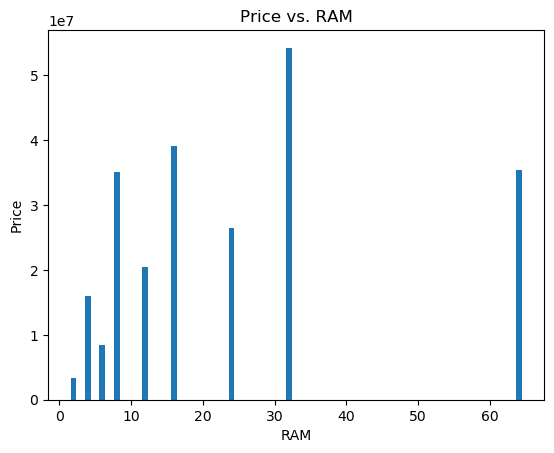

In [50]:
plt.bar(df['RAM'], df['Price'])
plt.title('Price vs. RAM')
plt.xlabel('RAM')
plt.ylabel('Price')
plt.show()

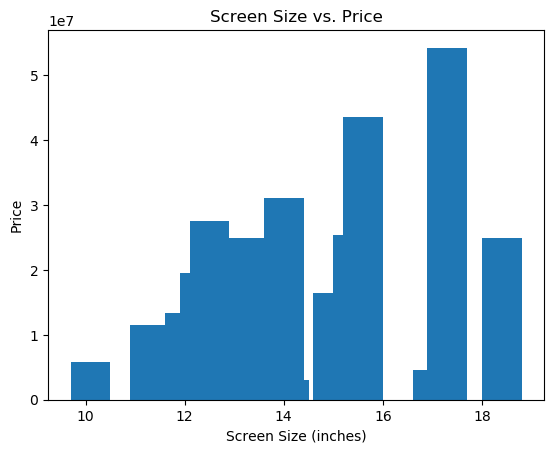

In [51]:
plt.bar(df['Screen Size'], df['Price'])
plt.title('Screen Size vs. Price')
plt.xlabel('Screen Size (inches)')
plt.ylabel('Price')
plt.show()

In [52]:
# Select the columns of interest
columns_of_interest = ['Screen Size', 'RAM', 'Weight', 'Price']
selected_data = df[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Print the correlation matrix
print(correlation_matrix)

             Screen Size       RAM    Weight     Price
Screen Size     1.000000  0.237743  0.827610  0.067922
RAM             0.237743  1.000000  0.383776  0.742802
Weight          0.827610  0.383776  1.000000  0.210166
Price           0.067922  0.742802  0.210166  1.000000


In [55]:
import statsmodels.api as sm

# Select the predictor variables
X = df[['Screen Size', 'RAM', 'Weight']]

# Add a constant term to the predictor variables matrix
X = sm.add_constant(X)

# Response variable
y = df['Price']

# Fit the multiple regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     561.1
Date:                Fri, 18 Aug 2023   Prob (F-statistic):          9.05e-234
Time:                        10:48:04   Log-Likelihood:                -21672.
No. Observations:                1302   AIC:                         4.335e+04
Df Residuals:                    1298   BIC:                         4.337e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.085e+07   1.69e+06      6.416      

In [56]:
# Choose the attribute for segmentation (e.g., 'Screen Size', 'RAM', or 'Weight')
segment_attribute = 'Screen Size'  # Replace with the attribute you want to use

# Calculate average price within each segment
average_price_by_segment = df.groupby(segment_attribute)['Price'].mean()

# Print the average price by segment
print(average_price_by_segment)

Screen Size
10.100000    4.431039e+06
11.300000    1.155071e+07
11.600000    3.500012e+06
12.000000    1.138087e+07
12.300000    1.092115e+07
12.500000    1.408042e+07
13.000000    1.266221e+07
13.300000    1.184697e+07
13.500000    1.433665e+07
13.900000    1.455917e+07
14.000000    1.069058e+07
14.100000    3.094416e+06
15.000000    1.301789e+07
15.400000    2.217529e+07
15.600000    8.020645e+06
17.000000    4.631843e+06
17.299999    1.487686e+07
18.400000    2.488871e+07
Name: Price, dtype: float64


In [57]:
# Choose the attribute for segmentation (e.g., 'Screen Size', 'RAM', or 'Weight')
segment_attribute = 'RAM'  # Replace with the attribute you want to use

# Calculate average price within each segment
average_price_by_segment = df.groupby(segment_attribute)['Price'].mean()

# Print the average price by segment
print(average_price_by_segment)

RAM
2     2.261862e+06
4     5.109098e+06
6     5.470415e+06
8     1.049979e+07
12    1.102109e+07
16    1.722793e+07
24    1.961872e+07
32    3.034916e+07
64    3.534570e+07
Name: Price, dtype: float64


In [58]:
# Choose the attribute for segmentation (e.g., 'Screen Size', 'RAM', or 'Weight')
segment_attribute = 'Weight'  # Replace with the attribute you want to use

# Calculate average price within each segment
average_price_by_segment = df.groupby(segment_attribute)['Price'].mean()

# Print the average price by segment
print(average_price_by_segment)

Weight
0.69    4.431039e+06
0.81    1.399601e+07
0.91    1.733940e+07
0.92    1.138087e+07
0.97    1.743721e+07
            ...     
4.40    2.488871e+07
4.42    2.557675e+07
4.50    2.088731e+07
4.60    2.432624e+07
4.70    3.458988e+07
Name: Price, Length: 171, dtype: float64


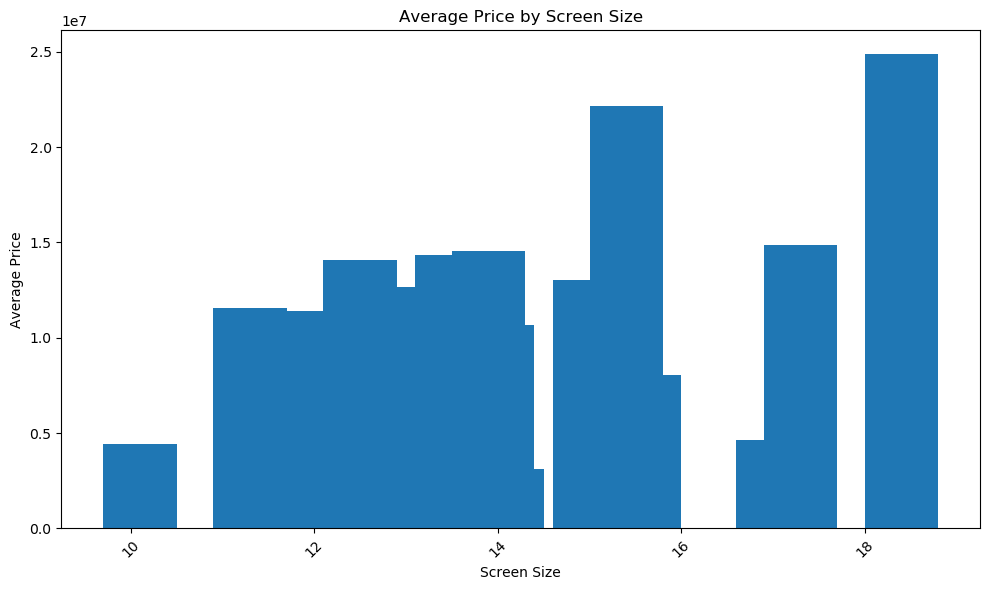

In [59]:
# Calculate average price within each screen size segment
average_price_by_screen_size = df.groupby('Screen Size')['Price'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(average_price_by_screen_size.index, average_price_by_screen_size.values)
plt.title('Average Price by Screen Size')
plt.xlabel('Screen Size')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

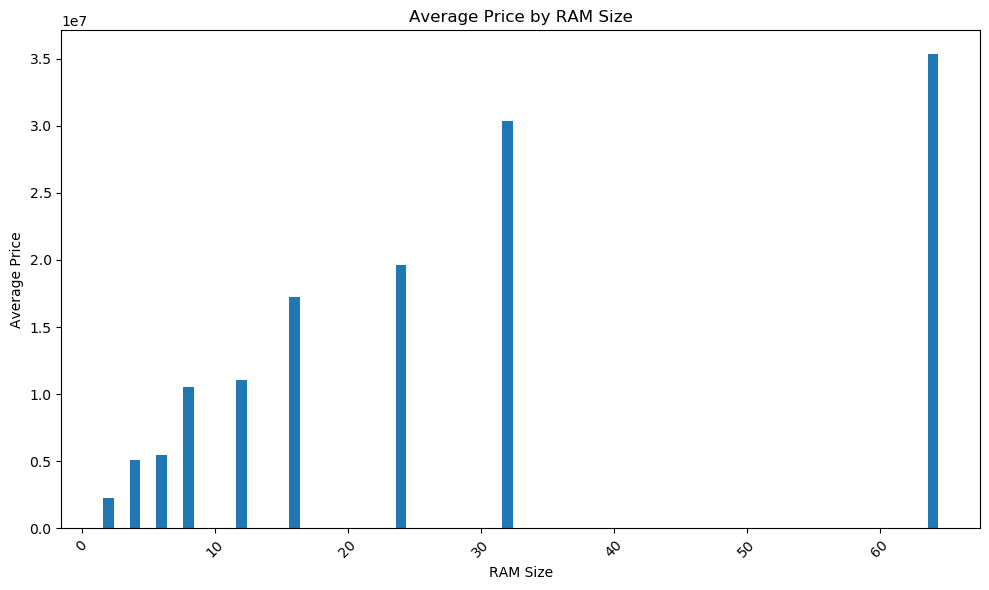

In [60]:
# Calculate average price within each RAM size segment
average_price_by_ram = df.groupby('RAM')['Price'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(average_price_by_ram.index, average_price_by_ram.values)
plt.title('Average Price by RAM Size')
plt.xlabel('RAM Size')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **MODELLING**

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split  # Import the train_test_split function
from sklearn.linear_model import LogisticRegression

target_col = 'Price'
feature_cols = [c for c in df.columns if c != target_col]

x = df[feature_cols]
y = df[target_col]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

lin_model = LogisticRegression()

In [65]:
x_train.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight
452,Asus,E402WA-GA007T (E2-6110/4GB/64GB/W10,Notebook,14.0,1366x768,AMD E-Series 6110 1.5GHz,4,64GB SSD,AMD Radeon R2,Windows,10 S,1.65
916,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,12,512GB SSD,AMD Radeon 530,Windows,10,2.20
1063,MSI,GS63VR 7RF,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows,10,1.80
575,Dell,Inspiron 5579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8,1TB HDD,Intel UHD Graphics 620,Windows,10,2.08
464,HP,Envy 13-AD007nv,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Intel HD Graphics 620,Windows,10,1.32


In [69]:
x_train.shape

(976, 12)

In [66]:
x_test.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight
1232,Acer,Chromebook CB5-571-C1DZ,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Celeron Dual Core 3205U 1.5GHz,4,16GB Flash Storage,Intel HD Graphics,Chrome OS,10,2.20
1030,Dell,Vostro 5568,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows,10,2.18
163,MSI,GP62M 7RDX,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows,10,2.40
1012,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,1TB HDD,AMD Radeon R5 M430,Windows,10,2.20
711,Lenovo,Ideapad 510S-13IKB,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,4,128GB SSD,Intel HD Graphics 620,Windows,10,1.50


In [68]:
x_test.shape

(326, 12)

In [70]:
lin_model.fit(x_train, y_train)

ValueError: could not convert string to float: 'Asus'